In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("income.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [3]:
df[["Age", "Income($)"]]

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


Text(0, 0.5, 'Income($)')

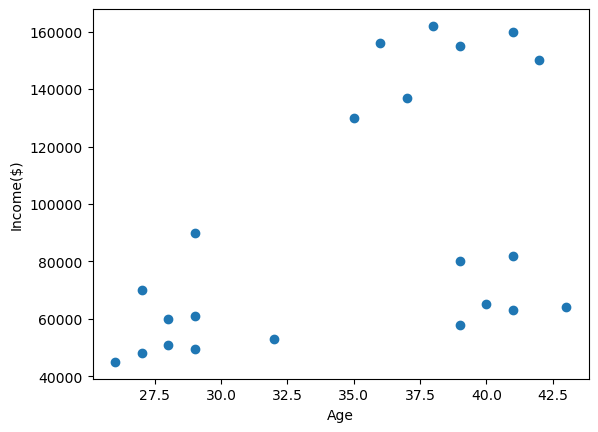

In [4]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

# Option 1 

In [5]:
model = KMeans(n_clusters=3)
model.fit(df[["Age", "Income($)"]])

KMeans(n_clusters=3)

In [7]:
y_pred = model.predict(df[["Age", "Income($)"]])
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

# Option 2

In [9]:
km = KMeans(n_clusters=3) # n_clusters ----> K 


y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted
# group 1 : 0 , Group 2 : 1,  group 3 : 2

array([1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [10]:
df['cluster']=y_predicted
df

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0


In [11]:
df1 = df[df["cluster"] == 0]
df1

,Name,Age,Income($),cluster
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0
10,Donald,37,137000,0


In [11]:
df["Income($)"].max()

162000

In [12]:
km.cluster_centers_  #centroids 

array([[3.82857143e+01, 1.50000000e+05],
       [3.24166667e+01, 5.72916667e+04],
       [3.63333333e+01, 8.40000000e+04]])

<Axes: xlabel='Age', ylabel='Income($)'>

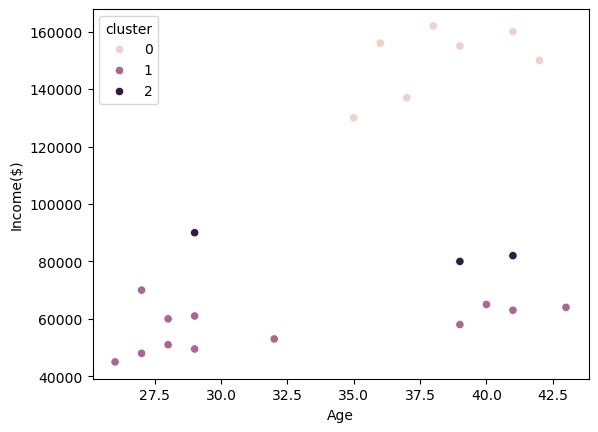

In [13]:
import seaborn as sns 

sns.scatterplot(data=df, x="Age", y="Income($)", hue="cluster")

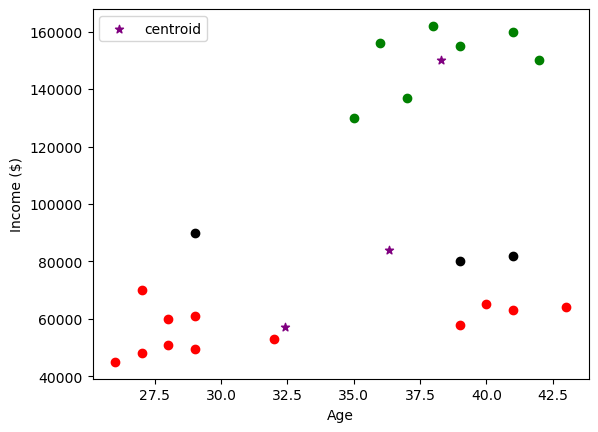

In [14]:
df1 = df[df['cluster']==0] # group 0
df2 = df[df['cluster']==1] # group 1
df3 = df[df['cluster']==2] # group 2

plt.scatter(df1.Age,df1['Income($)'],color='green') #group 0 ---> green 
plt.scatter(df2.Age,df2['Income($)'],color='red') #group 1 ---> Red 
plt.scatter(df3.Age,df3['Income($)'],color='black') #group 2 ---> Black
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [15]:
print(df.Age.min())
print(df.Age.max())
print(df["Income($)"].min())
print(df["Income($)"].max())

26
43
45000
162000


In [11]:
# normalization : 0 : 1, -1 :  1 , 80 : 90

<h4 style='color:purple'>Preprocessing using min max scaler</h4>

In [17]:
scaler = MinMaxScaler()


scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [18]:
df["Income($)"].max()

1.0

In [19]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


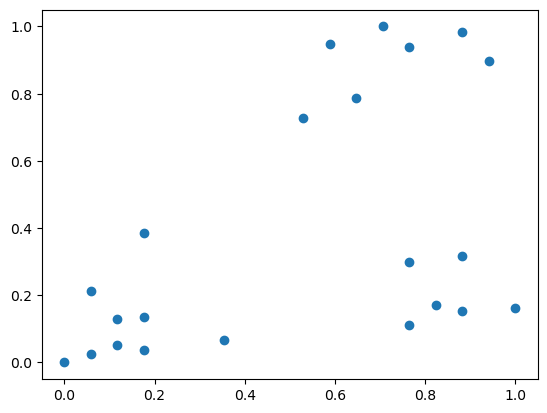

In [20]:
plt.scatter(df.Age,df['Income($)'])

In [21]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [22]:
df['cluster']=y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


In [23]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

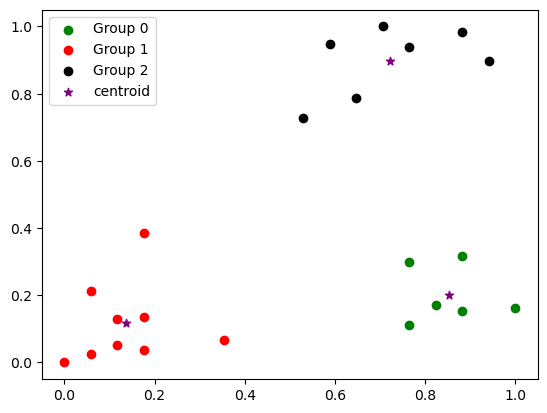

In [24]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green', label="Group 0")
plt.scatter(df2.Age,df2['Income($)'],color='red', label="Group 1")
plt.scatter(df3.Age,df3['Income($)'],color='black', label="Group 2")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [30]:
df 

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


<h4 style='color:purple'>Elbow Plot</h4>

In [25]:
WCSS = []
for i in range(1,10): #K -----> 1, 2, 3, 4 ..... 10
    km = KMeans(n_clusters=i)
    km.fit(df[['Age','Income($)']])
    WCSS.append(km.inertia_) #WCSS

In [26]:
WCSS 

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.40365551195705285,
 0.2941815801597912,
 0.27169165305274195,
 0.20320413291201156,
 0.14072448985352304,
 0.1438379981299864]

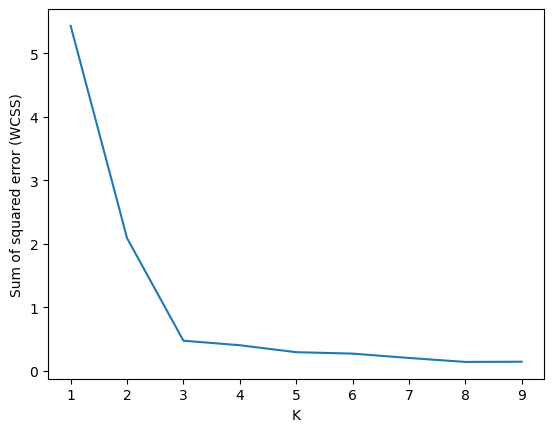

In [27]:
plt.xlabel('K')
plt.ylabel('Sum of squared error (WCSS)')
plt.plot(range(1,10),WCSS)

In [28]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df[['Age','Income($)']], y_predicted)

In [29]:
score

0.7129710183539275